In [10]:
import pandas as pd
import numpy as np
from bokeh.charts import Scatter, Line
from bokeh.io import show, output_notebook
from bokeh.layouts import column, row

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
data = pd.read_csv('/Users/jason.katz/Downloads/LT-HT1.csv')

In [5]:
data['lt'] = 1
for index, row in data.iterrows():
    data['lt'][index] = row['job_id'][-6:-3].replace("-", "")

/Users/jason.katz/anaconda/envs/holmes/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
data['ht'] = 1
for index, row in data.iterrows():
    data['ht'][index] = row['job_id'][-3:]
data['ht'][data['ht']<0]=data['ht'][data['ht']<0]*-1

/Users/jason.katz/anaconda/envs/holmes/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jason.katz/anaconda/envs/holmes/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
data['game'] = 'id'
for index, row in data.iterrows():
    data['game'][index] = row['job_id'][21:27]

/Users/jason.katz/anaconda/envs/holmes/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data = data[data['ht']!=0]

In [12]:
scat_ht_1 = Scatter(data, x='ht', y='mota', color='game')
scat_lt_1 = Scatter(data, x='lt', y='mota', color='game')
show(row(scat_ht_1,scat_lt_1))

In [13]:
data_ht = data.copy()
data_ht['hungarian'] = data_ht['ht']
data_ht = data_ht.groupby(['ht']).mean()
data_ht

mota      motp      motr  mostly_tracked    mt_auc   lt  hungarian
ht                                                                         
10   0.701681  0.649692  0.757088        0.488102  0.753010  4.5       10.0
20   0.737761  0.642323  0.809714        0.631243  0.804806  4.5       20.0
30   0.741616  0.640627  0.820286        0.658691  0.814814  4.5       30.0
40   0.743109  0.639821  0.826192        0.670028  0.820230  4.5       40.0
50   0.744397  0.639214  0.831258        0.683544  0.824869  4.5       50.0
60   0.745642  0.638734  0.835585        0.693103  0.828822  4.5       60.0
70   0.746716  0.638366  0.839355        0.702973  0.832228  4.5       70.0
80   0.747635  0.638114  0.842641        0.710640  0.835222  4.5       80.0
90   0.748367  0.637826  0.845532        0.719279  0.837855  4.5       90.0
100  0.749239  0.637617  0.848087        0.725028  0.840184  4.5      100.0
125  0.750870  0.637220  0.853808        0.739681  0.845355  4.5      125.0
150  0.752100  0.636949  0.858273        0.749752  0.849368  4.5      150.0
175  0.753258  0.636755  0.861972        0.759270  0.852729  4.5      175.0
200  0.754124  0.636629  0.864862        0.767006  0.855340  4.5      200.0
250  0.755430  0.636471  0.869204        0.776474  0.859238  4.5      250.0
350  0.757088  0.636282  0.874501        0.786390  0.863998  4.5      350.0
500  0.758912  0.636207  0.878477        0.793198  0.867550  4.5      500.0

In [14]:
data_lt = data.copy()
data_lt['lost'] = data_lt['lt']
data_lt = data_lt.groupby(['lt']).mean()
data_lt

mota      motp      motr  mostly_tracked    mt_auc          ht  lost
lt                                                                          
1   0.722437  0.644970  0.788366        0.577439  0.781680  135.294118   1.0
2   0.735913  0.642052  0.812794        0.634040  0.805434  135.294118   2.0
3   0.745104  0.639850  0.831005        0.677803  0.823286  135.294118   3.0
4   0.749619  0.638363  0.843994        0.713201  0.836105  135.294118   4.0
5   0.752693  0.637286  0.854343        0.739046  0.846379  135.294118   5.0
6   0.754355  0.636534  0.862734        0.761464  0.854711  135.294118   6.0
7   0.755292  0.635768  0.869403        0.778272  0.861345  135.294118   7.0
8   0.755387  0.635223  0.874696        0.791394  0.866644  135.294118   8.0

In [15]:
scat_ht_2 = Scatter(data_ht, x = 'hungarian', y='mota')
scat_ht_3 = Scatter(data_ht, x = 'hungarian', y='motp')
scat_ht_4 = Scatter(data_ht, x = 'hungarian', y='mostly_tracked')
scat_ht_5 = Scatter(data_ht, x = 'hungarian', y='mt_auc')
from bokeh.layouts import column, row
show(column(row(scat_ht_2, scat_ht_3), row(scat_ht_4, scat_ht_5)))

In [16]:
scat_lt_2 = Scatter(data_lt, x = 'lost', y='mota')
scat_lt_3 = Scatter(data_lt, x = 'lost', y='motp')
scat_lt_4 = Scatter(data_lt, x = 'lost', y='mostly_tracked')
scat_lt_5 = Scatter(data_lt, x = 'lost', y='mt_auc')
from bokeh.layouts import column, row
show(column(row(scat_lt_2, scat_lt_3), row(scat_lt_4, scat_lt_5)))

In [17]:
data['mota'].groupby(data['ht']).describe()

count      mean       std       min       25%       50%       75%  \
ht                                                                       
10    32.0  0.701681  0.077917  0.527469  0.636099  0.711955  0.741157   
20    32.0  0.737761  0.080594  0.551701  0.667757  0.761350  0.788728   
30    32.0  0.741616  0.080375  0.559616  0.673525  0.765839  0.790564   
40    32.0  0.743109  0.079824  0.568086  0.675424  0.767197  0.791407   
50    32.0  0.744397  0.078781  0.577204  0.677571  0.767523  0.791699   
60    32.0  0.745642  0.078302  0.584294  0.679174  0.768139  0.791914   
70    32.0  0.746716  0.077876  0.591562  0.682254  0.768323  0.792691   
80    32.0  0.747635  0.077485  0.596959  0.684183  0.767847  0.793094   
90    32.0  0.748367  0.076756  0.602291  0.686996  0.767835  0.793326   
100   32.0  0.749239  0.076605  0.606356  0.688225  0.767995  0.793838   
125   32.0  0.750870  0.076185  0.615408  0.692267  0.768764  0.794681   
150   32.0  0.752100  0.075803  0.621930  0.696193  0.769219  0.795801   
175   32.0  0.753258  0.075694  0.627758  0.699038  0.769585  0.797130   
200   32.0  0.754124  0.075574  0.632287  0.701823  0.769677  0.797945   
250   32.0  0.755430  0.075528  0.634868  0.706292  0.769757  0.799573   
350   32.0  0.757088  0.075440  0.633455  0.712364  0.770904  0.801274   
500   32.0  0.758912  0.075769  0.633622  0.717030  0.773003  0.802398   

          max  
ht             
10   0.820561  
20   0.842993  
30   0.845642  
40   0.845494  
50   0.844906  
60   0.845606  
70   0.846097  
80   0.845457  
90   0.845157  
100  0.845612  
125  0.846122  
150  0.846335  
175  0.847583  
200  0.848366  
250  0.849134  
350  0.850687  
500  0.852698

In [18]:
data['mota'].groupby(data['lt']).describe()

count      mean       std       min       25%       50%       75%  \
lt                                                                      
1    68.0  0.722437  0.086171  0.527469  0.645618  0.735996  0.784484   
2    68.0  0.735913  0.079757  0.557266  0.655854  0.748443  0.786699   
3    68.0  0.745104  0.075871  0.585893  0.669631  0.755607  0.789149   
4    68.0  0.749619  0.074569  0.604424  0.678140  0.757514  0.791147   
5    68.0  0.752693  0.073786  0.616889  0.683731  0.759188  0.791954   
6    68.0  0.754355  0.074234  0.625563  0.690236  0.759925  0.792902   
7    68.0  0.755292  0.074838  0.632262  0.694569  0.760589  0.794501   
8    68.0  0.755387  0.075357  0.633455  0.698280  0.761328  0.795659   

         max  
lt            
1   0.845143  
2   0.850994  
3   0.852698  
4   0.852027  
5   0.850438  
6   0.848755  
7   0.847011  
8   0.846097

In [19]:
data_lt_ht = data[data['game']=='ER0429'].copy()
data_lt_ht['lost'] = data_lt_ht['lt']
data_lt_ht['hungarian'] = data_lt_ht['ht']
data_lt_ht = data_lt_ht.loc[:,['mota','ht', 'lt', 'lost', 'hungarian']].groupby(['ht','lt']).mean()
data_lt_ht

mota  lost  hungarian
ht  lt                           
10  1   0.527469     1         10
    2   0.557266     2         10
    3   0.585893     3         10
    4   0.604424     4         10
    5   0.616889     5         10
    6   0.625563     6         10
    7   0.632262     7         10
    8   0.634582     8         10
20  1   0.551701     1         20
    2   0.585946     2         20
    3   0.614007     3         20
    4   0.629957     4         20
    5   0.640049     5         20
    6   0.646742     6         20
    7   0.650243     7         20
    8   0.652299     8         20
30  1   0.559616     1         30
    2   0.593467     2         30
    3   0.618835     3         30
    4   0.632471     4         30
    5   0.642209     5         30
    6   0.646066     6         30
    7   0.648254     7         30
    8   0.649015     8         30
40  1   0.568086     1         40
    2   0.600428     2         40
    3   0.622858     3         40
    4   0.633020     4         40
    5   0.641938     5         40
    6   0.644190     6         40
...          ...   ...        ...
200 3   0.646605     3        200
    4   0.646205     4        200
    5   0.644049     5        200
    6   0.640704     6        200
    7   0.637892     7        200
    8   0.634949     8        200
250 1   0.637182     1        250
    2   0.647254     2        250
    3   0.648281     3        250
    4   0.646064     4        250
    5   0.644183     5        250
    6   0.640697     6        250
    7   0.637373     7        250
    8   0.634868     8        250
350 1   0.643705     1        350
    2   0.650297     2        350
    3   0.650738     3        350
    4   0.647667     4        350
    5   0.643924     5        350
    6   0.640196     6        350
    7   0.636446     7        350
    8   0.633455     8        350
500 1   0.646255     1        500
    2   0.650863     2        500
    3   0.650693     3        500
    4   0.647518     4        500
    5   0.643991     5        500
    6   0.639549     6        500
    7   0.636334     7        500
    8   0.633622     8        500

[136 rows x 3 columns]

In [20]:
data_lt_ht = data.copy()
data_lt_ht['lost'] = data_lt_ht['lt']
data_lt_ht['hungarian'] = data_lt_ht['ht']
data_lt_ht = data_lt_ht.loc[:,['mota','ht', 'lt', 'lost', 'hungarian']].groupby(['ht','lt']).mean()
data_lt_ht

mota  lost  hungarian
ht  lt                           
10  1   0.661462     1         10
    2   0.677843     2         10
    3   0.693258     3         10
    4   0.704169     4         10
    5   0.711926     5         10
    6   0.717621     6         10
    7   0.722220     7         10
    8   0.724950     8         10
20  1   0.697128     1         20
    2   0.715903     2         20
    3   0.731368     3         20
    4   0.740470     4         20
    5   0.747870     5         20
    6   0.753308     6         20
    7   0.756843     7         20
    8   0.759201     8         20
30  1   0.703400     1         30
    2   0.721810     2         30
    3   0.736273     3         30
    4   0.744641     4         30
    5   0.751528     5         30
    6   0.756046     6         30
    7   0.758707     7         30
    8   0.760523     8         30
40  1   0.707511     1         40
    2   0.725161     2         40
    3   0.739056     3         40
    4   0.746393     4         40
    5   0.752576     5         40
    6   0.755779     6         40
...          ...   ...        ...
200 3   0.756063     3        200
    4   0.757173     4        200
    5   0.757850     5        200
    6   0.757070     6        200
    7   0.756837     7        200
    8   0.755396     8        200
250 1   0.745332     1        250
    2   0.753909     2        250
    3   0.758065     3        250
    4   0.758673     4        250
    5   0.758192     5        250
    6   0.757661     6        250
    7   0.756477     7        250
    8   0.755127     8        250
350 1   0.750540     1        350
    2   0.757191     2        350
    3   0.760521     3        350
    4   0.760220     4        350
    5   0.759068     5        350
    6   0.757806     6        350
    7   0.756350     7        350
    8   0.755009     8        350
500 1   0.753925     1        500
    2   0.760311     2        500
    3   0.762499     3        500
    4   0.761792     4        500
    5   0.760454     5        500
    6   0.759084     6        500
    7   0.757554     7        500
    8   0.755676     8        500

[136 rows x 3 columns]

In [22]:
scat_ht_lt_1 = Line(data_lt_ht, x='hungarian', y='mota', color='lost')
show(scat_ht_lt_1)

In [24]:
data_lt_ht

mota  lost  hungarian
ht  lt                           
10  1   0.661462     1         10
    2   0.677843     2         10
    3   0.693258     3         10
    4   0.704169     4         10
    5   0.711926     5         10
    6   0.717621     6         10
    7   0.722220     7         10
    8   0.724950     8         10
20  1   0.697128     1         20
    2   0.715903     2         20
    3   0.731368     3         20
    4   0.740470     4         20
    5   0.747870     5         20
    6   0.753308     6         20
    7   0.756843     7         20
    8   0.759201     8         20
30  1   0.703400     1         30
    2   0.721810     2         30
    3   0.736273     3         30
    4   0.744641     4         30
    5   0.751528     5         30
    6   0.756046     6         30
    7   0.758707     7         30
    8   0.760523     8         30
40  1   0.707511     1         40
    2   0.725161     2         40
    3   0.739056     3         40
    4   0.746393     4         40
    5   0.752576     5         40
    6   0.755779     6         40
...          ...   ...        ...
200 3   0.756063     3        200
    4   0.757173     4        200
    5   0.757850     5        200
    6   0.757070     6        200
    7   0.756837     7        200
    8   0.755396     8        200
250 1   0.745332     1        250
    2   0.753909     2        250
    3   0.758065     3        250
    4   0.758673     4        250
    5   0.758192     5        250
    6   0.757661     6        250
    7   0.756477     7        250
    8   0.755127     8        250
350 1   0.750540     1        350
    2   0.757191     2        350
    3   0.760521     3        350
    4   0.760220     4        350
    5   0.759068     5        350
    6   0.757806     6        350
    7   0.756350     7        350
    8   0.755009     8        350
500 1   0.753925     1        500
    2   0.760311     2        500
    3   0.762499     3        500
    4   0.761792     4        500
    5   0.760454     5        500
    6   0.759084     6        500
    7   0.757554     7        500
    8   0.755676     8        500

[136 rows x 3 columns]

In [46]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

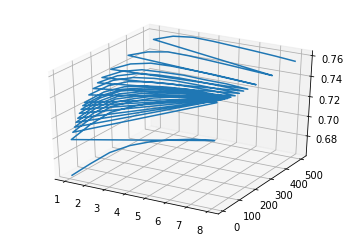

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(data_lt_ht['lost'], data_lt_ht['hungarian'], data_lt_ht['mota'], rstride=10, cstride=10)
plt.show()

In [59]:
import plotly
from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [77]:
trace = go.Scatter3d(
    x=data_lt_ht['lost'],
    y=data_lt_ht['hungarian'],
    z=data_lt_ht['mota'],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='simple-3d-scatter')

In [39]:
scat_ht_6 = Scatter(data_ht, x = 'hungarian', y='mota');scat_ht_6.y_range.start,scat_ht_6.y_range.end = (0,1)
scat_ht_7 = Scatter(data_ht, x = 'hungarian', y='motp');scat_ht_7.y_range.start,scat_ht_7.y_range.end = (0,1)
scat_ht_8 = Scatter(data_ht, x = 'hungarian', y='mostly_tracked');scat_ht_8.y_range.start,scat_ht_8.y_range.end = (0,1)
scat_ht_9 = Scatter(data_ht, x = 'hungarian', y='mt_auc');scat_ht_9.y_range.start,scat_ht_9.y_range.end = (0,1)
show(column(row(scat_ht_6, scat_ht_7), row(scat_ht_8, scat_ht_9)))

In [47]:
scat_lt_6 = Scatter(data_lt, x = 'lost', y='mota');scat_lt_6.y_range.start,scat_lt_6.y_range.end = (0,1)
scat_lt_7 = Scatter(data_lt, x = 'lost', y='motp');scat_lt_7.y_range.start,scat_lt_7.y_range.end = (0,1)
scat_lt_8 = Scatter(data_lt, x = 'lost', y='mostly_tracked');scat_lt_8.y_range.start,scat_lt_8.y_range.end = (0,1)
scat_lt_9 = Scatter(data_lt, x = 'lost', y='mt_auc');scat_lt_9.y_range.start,scat_lt_9.y_range.end = (0,1)
show(column(row(scat_lt_6, scat_lt_7), row(scat_lt_8, scat_lt_9)))

In [48]:
scat_ht_10 = Scatter(data, x='ht', y='mota', color='game');scat_ht_10.y_range.start,scat_ht_10.y_range.end = (0,1)
show(scat_ht_10)

In [49]:
scat_lt_10 = Scatter(data, x='lt', y='mota', color='game');scat_lt_10.y_range.start,scat_lt_10.y_range.end = (0,1)
show(scat_lt_10)